In [1]:
pwd

'C:\\Users\\Sameera'

In [2]:
import numpy as np # use for multi-dimensional array and matrix
import pandas as pd 
import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud
#from wordcloud import WordCloud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords

In [3]:
import sys
print(sys.executable)

C:\again\python.exe


In [4]:
import os
os.chdir('C:/Users/Sameera/Desktop/dessertetion')

In [5]:
phish_data=pd.read_csv("phishing_site.csv")

In [6]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [7]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [8]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [10]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

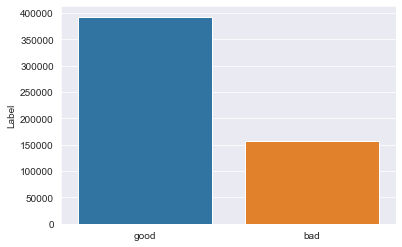

In [11]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [12]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [13]:
phish_data.URL[0]


'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [14]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [15]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 5.289798499999996 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized
150167,blog.aacriminallaw.com/?p=1769,good,"[blog, aacriminallaw, com, p]"
287396,banyancreations.com/,good,"[banyancreations, com]"
377775,linkedin.com/pub/steve-alford/5/8b1/613,good,"[linkedin, com, pub, steve, alford, b]"
284472,askbiography.com/bio/Andy_Roberts_(footballer)...,good,"[askbiography, com, bio, Andy, Roberts, footba..."
146615,au.linkedin.com/pub/paul-kiernan/7/506/769,good,"[au, linkedin, com, pub, paul, kiernan]"


In [17]:
stemmer = SnowballStemmer("english") # choose a language

In [18]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 129.2080359 sec


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
539748,dingeabyss.com/62fdz,bad,"[dingeabyss, com, fdz]","[dingeabyss, com, fdz]"
336714,fhwa.dot.gov/planning/nhs/hipricorridors/hpcor...,good,"[fhwa, dot, gov, planning, nhs, hipricorridors...","[fhwa, dot, gov, plan, nhs, hipricorridor, hpc..."
478113,youtube.com/watch?v=tmIuQ4UTYoY,good,"[youtube, com, watch, v, tmIuQ, UTYoY]","[youtub, com, watch, v, tmiuq, utyoy]"
47673,webdevelopmentagency.in/wp-includes/css/login....,bad,"[webdevelopmentagency, in, wp, includes, css, ...","[webdevelopmentag, in, wp, includ, css, login,..."
421477,reference.com/browse/Robert_Colescott,good,"[reference, com, browse, Robert, Colescott]","[refer, com, brows, robert, colescott]"


In [20]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.5496805999999879 sec


In [21]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
457728,vacationsbyrail.com/usa/amtrak_vacations/amtra...,good,"[vacationsbyrail, com, usa, amtrak, vacations,...","[vacationsbyrail, com, usa, amtrak, vacat, amt...",vacationsbyrail com usa amtrak vacat amtrak in...
257197,wchs.woodfordschools.org/wcsp/baseball/WCIT.html,good,"[wchs, woodfordschools, org, wcsp, baseball, W...","[wchs, woodfordschool, org, wcsp, basebal, wci...",wchs woodfordschool org wcsp basebal wcit html
173469,en.wikipedia.org/wiki/Coll%C3%A8ge_de_Maisonneuve,good,"[en, wikipedia, org, wiki, Coll, C, A, ge, de,...","[en, wikipedia, org, wiki, coll, c, a, ge, de,...",en wikipedia org wiki coll c a ge de maisonneuv
535543,cynonnet.com/bdb37,bad,"[cynonnet, com, bdb]","[cynonnet, com, bdb]",cynonnet com bdb
50382,www.goit.at/web/synchro-communications/,good,"[www, goit, at, web, synchro, communications]","[www, goit, at, web, synchro, communic]",www goit at web synchro communic


In [22]:
#sliceing classes
# bad_sites = df[df.Label == 'bad']
# good_sites = df[df.Label == 'good']
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [23]:
bad_sites.head()


,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [24]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [25]:
import nltk
from nltk.corpus import stopwords

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [26]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

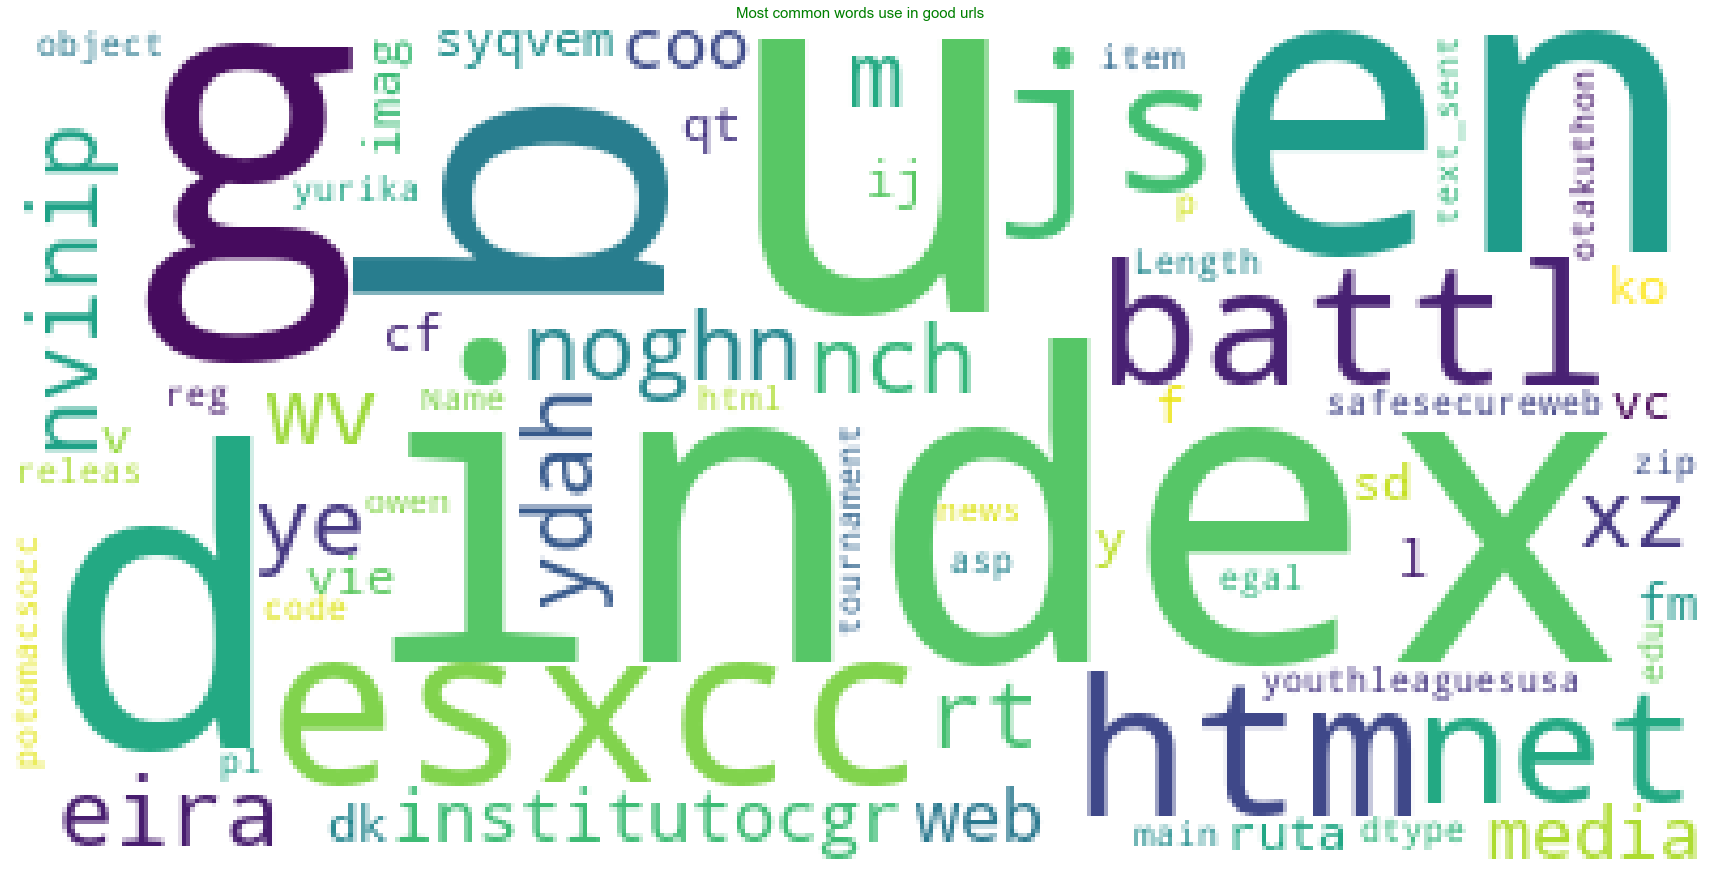

In [27]:
common_text = str(data)
# common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [28]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

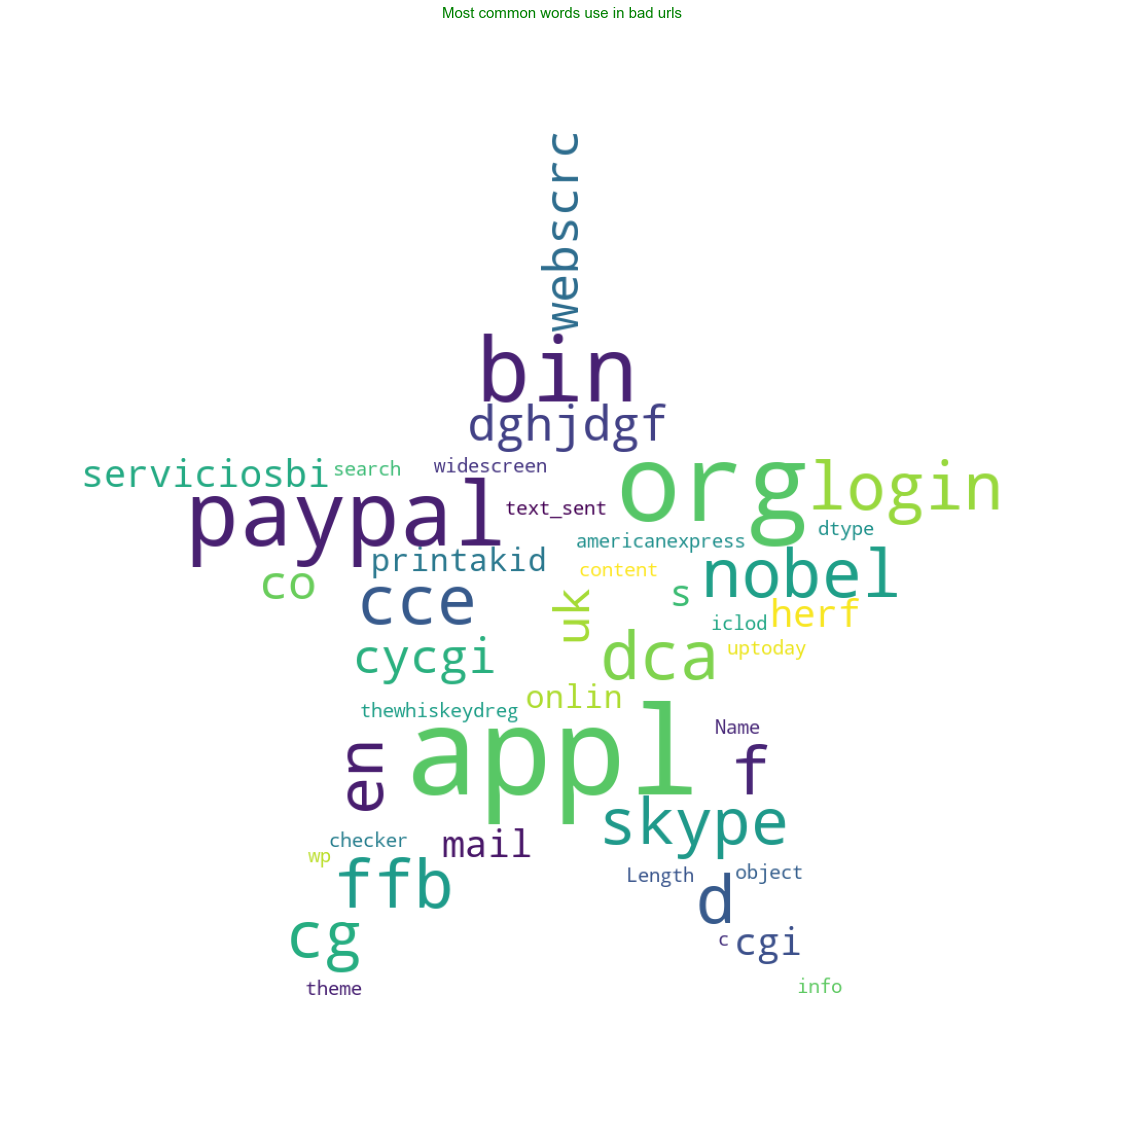

In [29]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [ ]:
browser = webdriver.Chrome(r"chromedriver.exe")

In [31]:
# pwd

In [32]:
import os
os.chdir('C:\\Users\\Sameera\\Desktop\\dessertetion')

In [33]:
list_urls = ['https://samewaywins.com/ccplusservice/UK/?dom=trakgobigmedia.com&cep=90-JeQ1DbTXGltUWxrdC6CkRrXUDU36P1B_0s-3Wf34AjIqVcCGtEVHSA3Jctq6EMAnDsxr2Bv9Vop1ryUSw4MKbT2x8GpDOXoFcnR1cPz4WA9uyP3w8LI91h756FvUz8gvkuPeXJI-ImH6CyItqv-u1X3LlkpGOngF_qkR7DCIyta0QigZsh6XtshiyPIdh8cMp7dzu8LEUFhRIeQyK0lvsPPHaxk7G3RLyjKHMw7CN4EDJqtMfCGxBd-8-xXYfSjT5Q1fXcfTKsfx1Dy_Wb70nLvZcEFaz_xiEiQSYTYc3XrbXHAe6cphZeGxy8Jn79udvmrnwJRuufcsMhSxI118iQG8Pjy_lCElaPor3X5Bzz6SkkNGSoXdYnzgHrFQF&lptoken=16ab10043715079748a6','chrome-extension://fheoggkfdfchfphceeifdbepaooicaho/html/site_status_block_page.html',
             'https://lts.lehigh.edu/phishing/examples','chrome-extension://fheoggkfdfchfphceeifdbepaooicaho/html/site_status_block_page.html','https://www.ezeephones.com/about-us'] 
#here i take phishing sites 
links_with_text = []

In [34]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])


In [35]:
 df = pd.DataFrame(links_with_text, columns=["from", "to"])
# good_sites = pd.DataFrame(links_with_text, columns=["from", "to"])
# bad_sites = pd.DataFrame(links_with_text, columns=["from", "to"])

In [59]:
df.head(20)

,from,to
0,https://samewaywins.com/ccplusservice/UK/?dom=...,https://trakgobigmedia.com/click
1,chrome-extension://fheoggkfdfchfphceeifdbepaoo...,None
2,chrome-extension://fheoggkfdfchfphceeifdbepaoo...,None
3,chrome-extension://fheoggkfdfchfphceeifdbepaoo...,None
4,chrome-extension://fheoggkfdfchfphceeifdbepaoo...,None
5,chrome-extension://fheoggkfdfchfphceeifdbepaoo...,None
6,https://lts.lehigh.edu/phishing/examples,#skip-content
7,https://lts.lehigh.edu/phishing/examples,https://lehigh.edu
8,https://lts.lehigh.edu/phishing/examples,/
9,https://lts.lehigh.edu/phishing/examples,https://library.lehigh.edu


In [37]:
# df.info()

In [38]:
#create cv object
cv = CountVectorizer()

In [39]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [40]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [42]:
# create lr object
lr = LogisticRegression()

In [43]:
lr.fit(trainX,trainY)

LogisticRegression()

In [44]:
lr.score(testX,testY)

0.9655518906048625

In [45]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9794397695195979
Testing Accuracy : 0.9655518906048625

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36832
        Good       0.99      0.96      0.98    100505

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


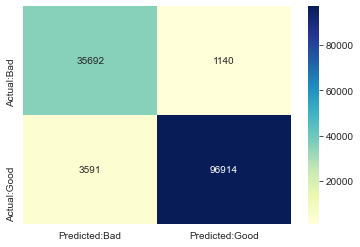

In [46]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [47]:
# create mnb object
mnb = MultinomialNB()

In [48]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [49]:
mnb.score(testX,testY)

0.9580156840472706

In [50]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9741656128870971
Testing Accuracy : 0.9580156840472706

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93     38249
        Good       0.98      0.97      0.97     99088

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


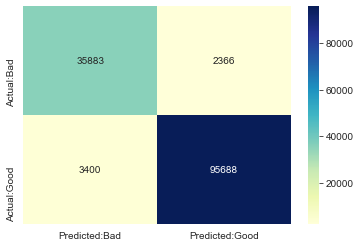

In [51]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

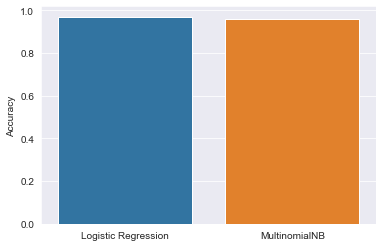

In [52]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

In [53]:
#So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression

In [54]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray

In [55]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [56]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [57]:
pipeline_ls.score(testX,testY)

0.9668115657106242

Training Accuracy : 0.9806800336885845
Testing Accuracy : 0.9668115657106242

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36764
        Good       0.99      0.97      0.98    100573

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


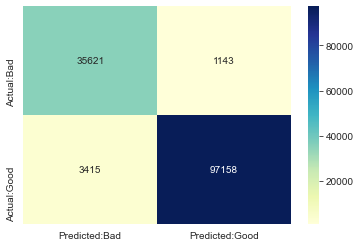

In [60]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [61]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [62]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9668115657106242
